In [8]:
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision import transforms

transform = transforms.Compose([transforms.ToTensor(), 
                                #transforms.Normalize((0.1307,), (0.3081,)),
                                ]) #flatten serve per convertire le immagini in vettori di 784 unità 

mnist_train = MNIST(root='mnist',train=True, download=True, transform=transform)
mnist_test = MNIST(root='mnist',train=False, download=True, transform=transform)


mnist_train_loader = DataLoader(mnist_train, batch_size=512, num_workers=2, shuffle=True)
mnist_test_loader = DataLoader(mnist_test, batch_size=512, num_workers=2)

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
from pytorch_lightning.loggers import TensorBoardLogger
from torchvision.utils import make_grid
from classes import *
from torch.optim import Adam

In [10]:
# # Define training function
# encoder = torch.load('vitFashion16_encoder.pth')
# def train_mae(model, dataloader, optimizer, num_epochs=20, device='mps'):
#     model.to(device)
#     model.train()
    
#     for epoch in range(num_epochs):
#         total_loss = 0
#         for data in dataloader:
#             img, label = data
#             img = img.to(device)
#             optimizer.zero_grad()
#             loss, _ , _ = model(img)
#             loss.backward()
#             optimizer.step()
            
#             total_loss += loss.item()

#         avg_loss = total_loss / len(dataloader)
#         print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

# # Initialize the MAE model
# # Assume 'encoder' is your pre-trained vision transformer model
# mae_model = MAE(
#     encoder=encoder,
#     decoder_dim=512,
#     masking_ratio=0.25,
#     decoder_depth=1,
#     decoder_heads=8,
#     decoder_dim_head=64
# )

# # Data transformations
# transform = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.5,), (0.5,))
# ])


# # Define the optimizer
# optimizer = Adam(mae_model.parameters(), lr=1e-4)

# # Train the model
# train_mae(mae_model, mnist_train_loader, optimizer, num_epochs=20, device='mps')


In [11]:
model = torch.load('mae_model_digits.pth')

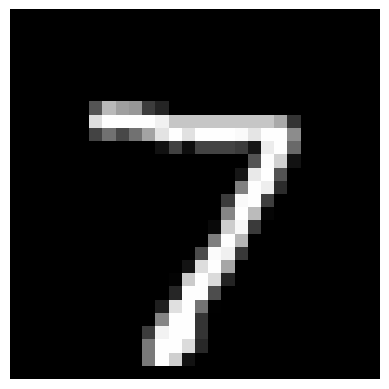

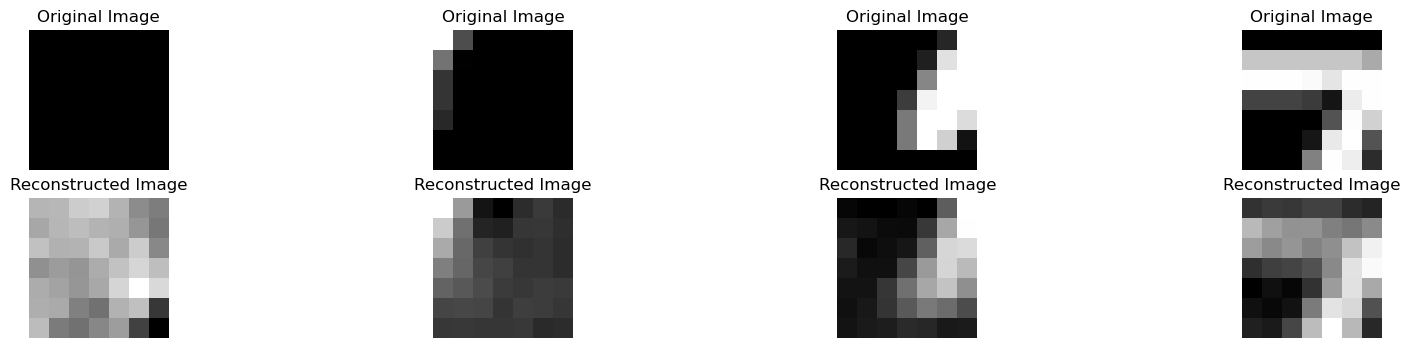

In [15]:
model.eval()
device = torch.device('mps')


img = mnist_test[0][0].unsqueeze(0)
img = img.to(device)
pred_loss, pred_patch, masked = model(img)
last_image = img

#plot last image
plt.imshow(last_image[0].cpu().numpy().reshape((28, 28)), cmap='gray')
plt.axis('off')
plt.show()


import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 4, figsize=(20, 4))

for i in range(4):
    img = masked[0][i]
    loss_imgs = pred_patch[0][i]
    img = img.to(device)


    axs[0, i].imshow(img.cpu().numpy().reshape((7, 7)), cmap='gray')
    axs[0, i].axis('off')
    axs[0, i].set_title('Original Image')

    axs[1, i].imshow(loss_imgs.cpu().detach().numpy().reshape((7,7)), cmap='gray')
    axs[1, i].axis('off')
    axs[1, i].set_title('Reconstructed Image')

plt.show()
